# 「ガウス過程と機械学習」
# P.41 ガウス分布からのサンプリング

$(0, 1)$からの一様乱数をBox-Muller法を用いて発生させることができる。

$$
\begin{cases}
r_{1} = rand() \\
r_{2} = rand() \\
x = \sqrt{-2 \log r_{1}} \sin (2 \pi r_{2}) \\
\end{cases}
$$

平均$\mu$、分散$\sigma^{2}$のガウス分布$N(\mu, \sigma^{2})$は標準正規分布と比べて、$x$ のスケールが$\sigma$倍で、値が$\mu$だけシフトしているため、上記で得られた$x$を使って、

$$ x' = \mu + \sigma x $$

とすれば、$N(\mu, \sigma^{2})$に従うサンプル$x'$が得られる。

In [18]:
using Distributions
using StatsBase
using Plots

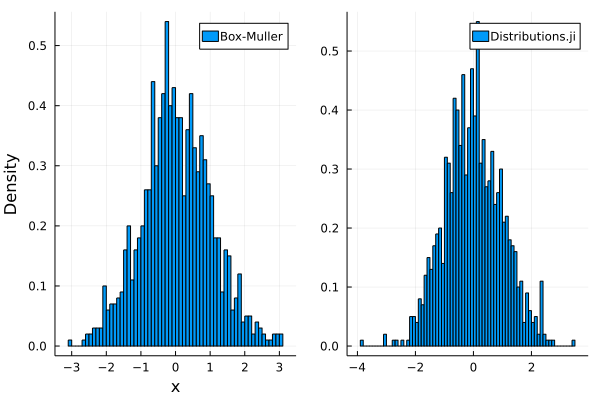

In [25]:
N = 1000
r₁ = rand(N)
r₂ = rand(N)
x = sqrt.(-2 .* log.(r₁)) .* sin.(2π .* r₂)

μ = 0.0
σ = 1.0
gauss = μ .+ σ .* x

bins = 80
plot(
    histogram(gauss; bins, label="Box-Muller", xlabel="x", ylabel="Density", norm=:pdf), 
    histogram(rand(Normal(0.0, 1.0), N); bins, label="Distributions.ji", norm=:pdf)
)